## Importing the libraries

In [308]:
%matplotlib inline
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import numpy as np
from matplotlib import pyplot  as plt
import mplfinance as mpf

## Store API key

In [309]:
API_key='T9KRPI88N0D1Y7Y5'

## Defining a Class ScriptData 

In [310]:
class ScriptData(object):
    df=""
    script1=""
    def fetch_intraday_data(self,script):
        ts = TimeSeries(key='T9KRPI88N0D1Y7Y5')
    def convert_intraday_data(self,script):
        ts = TimeSeries(key='T9KRPI88N0D1Y7Y5',output_format='pandas',indexing_type='integer')
        '''The library supports giving its results as json dictionaries (default), pandas dataframe (if installed) or csv,
           simply pass the parameter output_format='pandas' to change the format of the output for all the API calls in the given class.'''
        # Get json object with the intraday data and another with  the call's metadata
        self.df, meta_data = ts.get_intraday(script,interval='60min',outputsize='full')
        self.df.rename(columns={'index':'timestamp'},inplace=True) #changing column name
        self.df.rename(columns={'1. open':'open'},inplace=True)
        self.df.rename(columns={'2. high':'high'},inplace=True)
        self.df.rename(columns={'3. low':'low'},inplace=True)
        self.df.rename(columns={'4. close':'close'},inplace=True)
        self.df.rename(columns={'5. volume':'volume'},inplace=True)
        self.df=self.df.astype({"volume":int})
       
        self.ScriptData={script: self.df}  # making class object subscrible
        
    def __getitem__(self,item):
        return self.ScriptData[item]
    def __setitem__(self,item):
        pass
    def __contains__(self,item):
        pass

## Defining a function called indicator1

In [311]:
def indicator1(df,ts): # ts-timeperiod
    close_data=df['close']
    avg_close=[0]*(len(close_data)-1)
    avg_close=np.array(avg_close)
    avg_close=np.append(avg_close,close_data[ts-1])
    for i in range(0,ts-1):
        avg_close[i]="NaN"
    for i in range(ts-1,len(close_data)):
        sum1=0
        for j in range(ts-1,-1,-1):
            sum1+=close_data[i-j]
        sum1=(sum1/ts)
        avg_close[i]=sum1   
    d = {'timestamp': df['timestamp'], 'indicator': avg_close}
    df2_indicator = pd.DataFrame(data=d)
    print(df2_indicator) 
    return avg_close

##  Plotting a candlestick chart

In [312]:
def chart(df2,avg=3):
    df2.timestamp=pd.to_datetime(df2.timestamp) #changing the data type from object to datetime
    df2=df2.set_index("timestamp")
    df2=df2.iloc[::-1]
    mpf.plot(df2['2023-02-01 10:17:00':'2023-02-05  20:17:00'],figratio=(20,10),type='candle',volume=True,style='yahoo',mav=(avg),tight_layout=True)


## Defining a class Strategy 

In [313]:
class Strategy:
    script=""
    df=""
    historical_day=0
    close_data=""
    indicator_data=""
    def __init__(self,script1) -> None:
        self.script=script1
        
    
    def get_script_data(self):
        script_data=ScriptData()
        script_data.convert_intraday_data(self.script)
        self.historical_day=script_data.df['timestamp']
        self.close_data=script_data.df['close']
        self.indicator_data=indicator1(script_data[self.script],4)

        
    def get_signals(self):
        l2=[0]*(len(self.close_data))
        i=0
        l2.clear()
        new_timestamp=[]
        while(i<100):
            while(self.close_data[i]>self.indicator_data[i]):
                i=i+1
                if(i>100):
                    break
            else:
                l2.append("SELL")
                new_timestamp.append(self.historical_day[i])
                i=i+1
            while(self.close_data[i]<self.indicator_data[i]):
                i=i+1
                if(i>100):
                    break
            else:
                l2.append("BUY") 
                new_timestamp.append(self.historical_day[i]) 
                i=i+1         
        signal=np.array(l2,dtype=object)
        new_timestamp=np.array(new_timestamp)
        d = {'timestamp': new_timestamp, 'signal': signal}
        df2 = pd.DataFrame(data=d)            
        print(df2)
        
    
     




In [314]:
script_data=ScriptData()
script_data.fetch_intraday_data('AAPL')
script_data.convert_intraday_data('AAPL')
script_data['AAPL']

,timestamp,open,high,low,close,volume
index,,,,,,
0,2023-02-15 20:00:00,155.3100,155.5100,155.3000,155.4800,64129
1,2023-02-15 19:00:00,155.2600,155.3900,155.2600,155.3300,33801
2,2023-02-15 18:00:00,155.2900,155.3300,155.2404,155.2900,43602
3,2023-02-15 17:00:00,155.3200,155.4500,155.0800,155.3000,1266637
4,2023-02-15 16:00:00,155.0200,155.3800,154.6700,155.3600,7694429
...,...,...,...,...,...,...
603,2022-12-21 09:00:00,132.2419,133.0290,132.1614,132.7298,259720
604,2022-12-21 08:00:00,132.6301,132.7697,132.1614,132.6700,106718
605,2022-12-21 07:00:00,132.7098,132.8195,132.3907,132.6700,24454


In [315]:
script_data.fetch_intraday_data('GOOGL')
script_data.convert_intraday_data('GOOGL')
script_data['GOOGL']

,timestamp,open,high,low,close,volume
index,,,,,,
0,2023-02-15 20:00:00,96.9300,97.12,96.80,97.10,84085
1,2023-02-15 19:00:00,96.9000,97.01,96.89,96.94,68819
2,2023-02-15 18:00:00,96.9406,96.96,96.86,96.90,61057
3,2023-02-15 17:00:00,96.9400,97.08,96.85,96.95,987263
4,2023-02-15 16:00:00,96.6900,96.97,96.38,96.97,8602688
...,...,...,...,...,...,...
603,2022-12-21 09:00:00,89.3500,89.50,88.70,89.35,84600
604,2022-12-21 08:00:00,89.3400,89.40,88.69,89.30,41846
605,2022-12-21 07:00:00,89.1700,89.30,89.00,89.30,12867


In [316]:
indicator1(script_data['GOOGL'],4)

                 timestamp  indicator
index                                
0      2023-02-15 20:00:00        NaN
1      2023-02-15 19:00:00        NaN
2      2023-02-15 18:00:00        NaN
3      2023-02-15 17:00:00   96.97250
4      2023-02-15 16:00:00   96.94000
...                    ...        ...
603    2022-12-21 09:00:00   89.26875
604    2022-12-21 08:00:00   89.19000
605    2022-12-21 07:00:00   89.12000
606    2022-12-21 06:00:00   89.28250
607    2022-12-21 05:00:00   89.35750

[608 rows x 2 columns]


array([       nan,        nan,        nan,  96.9725  ,  96.94    ,
        96.875475,  96.805475,  96.60995 ,  96.42335 ,  96.050375,
        95.490375,  95.02945 ,  94.56105 ,  94.26355 ,  94.20105 ,
        94.1325  ,  94.075   ,  94.165   ,  94.2325  ,  94.314975,
        94.442475,  94.39245 ,  94.2087  ,  93.91685 ,  93.424525,
        93.114575,  93.159575,  93.40645 ,  93.953775,  94.43125 ,
        94.67    ,  94.78    ,  94.6675  ,  94.5275  ,  94.455   ,
        94.435   ,  94.4925  ,  94.494525,  94.573275,  94.569525,
        94.487025,  94.455   ,  94.50375 ,  94.6325  ,  94.87    ,
        95.1025  ,  95.105   ,  95.0675  ,  94.9275  ,  94.8075  ,
        94.682975,  94.587975,  94.557975,  94.551775,  94.645275,
        94.701525,  94.710275,  94.923975,  95.0275  ,  95.26125 ,
        95.26    ,  94.99    ,  94.8725  ,  94.685   ,  94.785   ,
        95.0075  ,  95.095   ,  95.185   ,  95.18    ,  94.935   ,
        94.8825  ,  94.57    ,  94.375   ,  94.67375 ,  95.091

In [317]:
strategy=Strategy('NVDA')
strategy.get_script_data()
strategy.get_signals()


                 timestamp  indicator
index                                
0      2023-02-15 20:00:00        NaN
1      2023-02-15 19:00:00        NaN
2      2023-02-15 18:00:00        NaN
3      2023-02-15 17:00:00  227.63220
4      2023-02-15 16:00:00  227.50720
...                    ...        ...
603    2022-12-21 09:00:00  163.78750
604    2022-12-21 08:00:00  163.03875
605    2022-12-21 07:00:00  162.11875
606    2022-12-21 06:00:00  161.60750
607    2022-12-21 05:00:00  161.59000

[608 rows x 2 columns]
              timestamp signal
0   2023-02-15 20:00:00   SELL
1   2023-02-15 19:00:00    BUY
2   2023-02-15 18:00:00   SELL
3   2023-02-15 16:00:00    BUY
4   2023-02-15 15:00:00   SELL
5   2023-02-15 09:00:00    BUY
6   2023-02-15 06:00:00   SELL
7   2023-02-14 20:00:00    BUY
8   2023-02-14 17:00:00   SELL
9   2023-02-14 16:00:00    BUY
10  2023-02-14 15:00:00   SELL
11  2023-02-14 10:00:00    BUY
12  2023-02-14 09:00:00   SELL
13  2023-02-14 06:00:00    BUY
14  2023-02-14 05

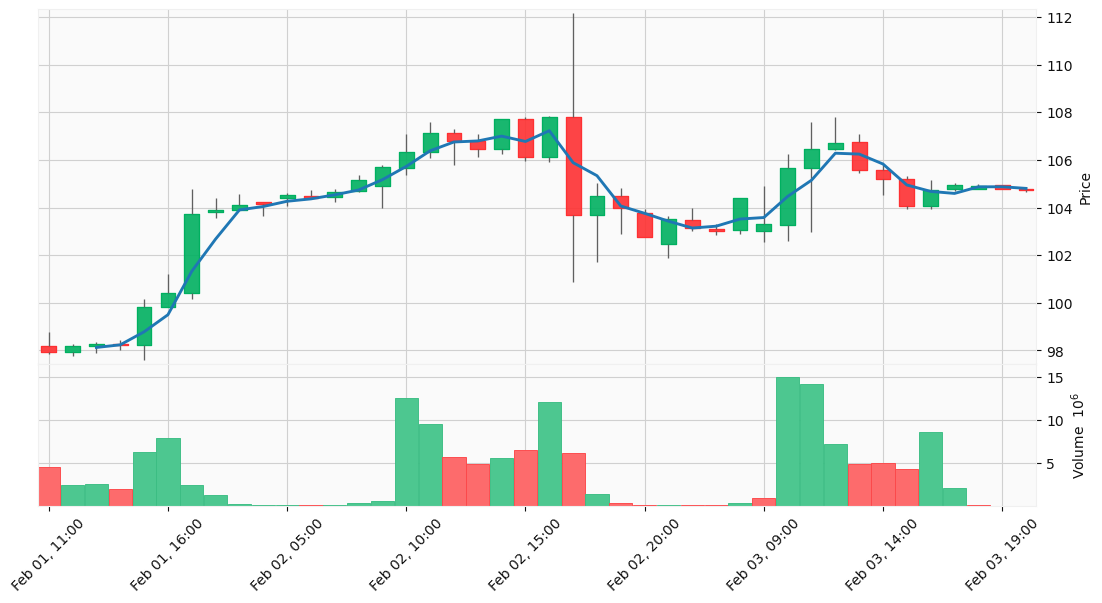

In [318]:
chart(script_data['GOOGL'])